# Importing the libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Cost Function

In [18]:
def Sphere(x):
    return np.sum(x**2)

# PSO Parameters

In [19]:
MaxIt = 6000 #Maximum Number of Iterations
nPop = 20    #Population Size (Swarm Size)

# w=1;            # Inertia Weight
# wdamp=0.99;     # Inertia Weight Damping Ratio
# c1=2;           # Personal Learning Coefficient
# c2=2;           # Global Learning Coefficient

# Constriction Coefficients
phi1 = 2.05
phi2 = 2.05
phi = phi1 + phi2
chi = 2 / (phi - 2 + np.sqrt(phi**2 - 4*phi))
w = chi
wdamp = 1
c1 = chi * phi1
c2 = chi * phi2

# Problem Definition

In [20]:
VarMin = -10  # Lower Bound of Variables
VarMax = 10   # Upper Bound of Variables
VarSize = (1, 5)  # Size of Decision Variables Matrix

# Velocity Limits
VelMax = 0.1 * (VarMax - VarMin)
VelMin = -VelMax

# Initialization

In [21]:
empty_particle = {'Position': None, 'Cost': None, 'Velocity': None, 'Best': {'Position': None, 'Cost': None}}

particle = [empty_particle.copy() for _ in range(nPop)]
GlobalBest = {'Cost': np.inf}

for i in range(nPop):
    #Initialize Position
    particle[i]['Position'] = np.random.uniform(VarMin, VarMax, VarSize)  #Initialize Position
    particle[i]['Velocity'] = np.zeros(VarSize)           #Initialize Velocity
    particle[i]['Cost'] = Sphere(particle[i]['Position']) #Evaluation
    #Update Personal Best
    particle[i]['Best']['Position'] = particle[i]['Position'].copy() 
    particle[i]['Best']['Cost'] = particle[i]['Cost']  
    
    if particle[i]['Best']['Cost'] < GlobalBest['Cost']:  #Update Global Best
        GlobalBest = particle[i]['Best'].copy()

BestCost = np.zeros(MaxIt)
nfe = np.zeros(MaxIt)

# PSO Main Loop

Iteration 1: NFE = 1.0, Best Cost = 46.533362459196994
Iteration 2: NFE = 2.0, Best Cost = 19.956363388800227
Iteration 3: NFE = 3.0, Best Cost = 3.021002343206518
Iteration 4: NFE = 4.0, Best Cost = 2.0075784073150085
Iteration 5: NFE = 5.0, Best Cost = 2.0075784073150085
Iteration 6: NFE = 6.0, Best Cost = 2.0075784073150085
Iteration 7: NFE = 7.0, Best Cost = 1.2742700815121468
Iteration 8: NFE = 8.0, Best Cost = 1.2742700815121468
Iteration 9: NFE = 9.0, Best Cost = 0.7991020805339236
Iteration 10: NFE = 10.0, Best Cost = 0.7991020805339236
Iteration 11: NFE = 11.0, Best Cost = 0.6536468919284523
Iteration 12: NFE = 12.0, Best Cost = 0.6536468919284523
Iteration 13: NFE = 13.0, Best Cost = 0.37905472884127706
Iteration 14: NFE = 14.0, Best Cost = 0.37905472884127706
Iteration 15: NFE = 15.0, Best Cost = 0.2518577870225959
Iteration 16: NFE = 16.0, Best Cost = 0.15329620654470202
Iteration 17: NFE = 17.0, Best Cost = 0.15329620654470202
Iteration 18: NFE = 18.0, Best Cost = 0.153296

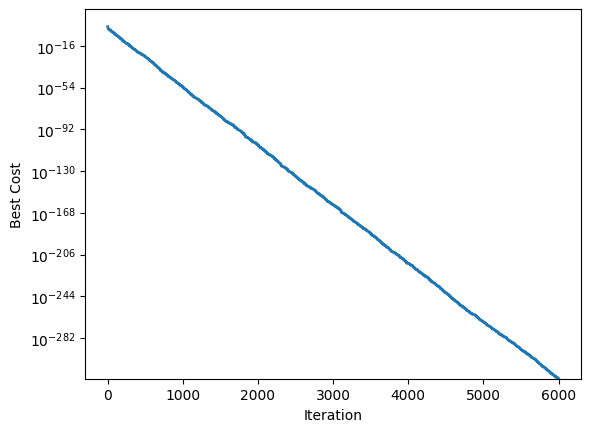

In [22]:
for it in range(MaxIt):
    for i in range(nPop):
        # Update Velocity
        particle[i]['Velocity'] = w * particle[i]['Velocity'] \
            + c1 * np.random.rand(*VarSize) * (particle[i]['Best']['Position'] - particle[i]['Position']) \
            + c2 * np.random.rand(*VarSize) * (GlobalBest['Position'] - particle[i]['Position'])
        
        # Apply Velocity Limits
        particle[i]['Velocity'] = np.maximum(particle[i]['Velocity'], VelMin)
        particle[i]['Velocity'] = np.minimum(particle[i]['Velocity'], VelMax)

        # Update Position
        particle[i]['Position'] = particle[i]['Position'] + particle[i]['Velocity']

        # Velocity Mirror Effect
        IsOutside = (particle[i]['Position'] < VarMin) | (particle[i]['Position'] > VarMax)
        particle[i]['Velocity'][IsOutside] = -particle[i]['Velocity'][IsOutside]

        # Apply Position Limits
        particle[i]['Position'] = np.maximum(particle[i]['Position'], VarMin)
        particle[i]['Position'] = np.minimum(particle[i]['Position'], VarMax)
        
        # Evaluation
        particle[i]['Cost'] = Sphere(particle[i]['Position'])

        # Update Personal Best
        if particle[i]['Cost'] < particle[i]['Best']['Cost']:
            particle[i]['Best']['Position'] = particle[i]['Position'].copy()
            particle[i]['Best']['Cost'] = particle[i]['Cost']

            # Update Global Best
            if particle[i]['Best']['Cost'] < GlobalBest['Cost']:
                GlobalBest = particle[i]['Best'].copy()
    
    BestCost[it] = GlobalBest['Cost']
    nfe[it] = it + 1
    
    print(f'Iteration {it + 1}: NFE = {nfe[it]}, Best Cost = {BestCost[it]}')
    
    w *= wdamp

# Results
plt.figure()
plt.semilogy(nfe, BestCost, linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Best Cost')
plt.show()